In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
plt.rcParams['font.sans-serif'] = ['simhei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [3]:
data = pd.read_csv('blood_pressure.csv')

# 选择特征和目标变量
X = data[['Age', 'BMI', 'Cholesterol']]
y = data['BP']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 创建线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

模型评估:
均方误差(MSE): 17.33
R平方(R2): 0.82

模型系数:
            特征        系数
0          Age  0.252500
1          BMI  1.937099
2  Cholesterol  0.056297
截距: 72.86


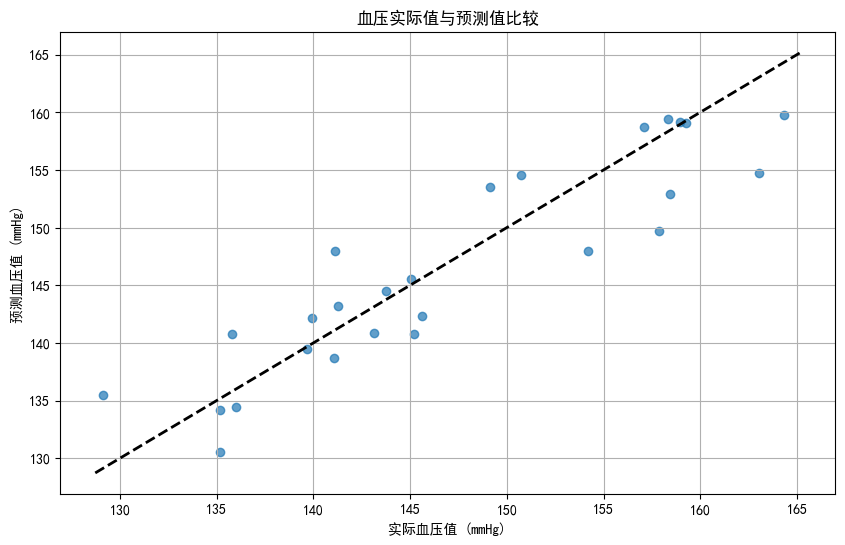

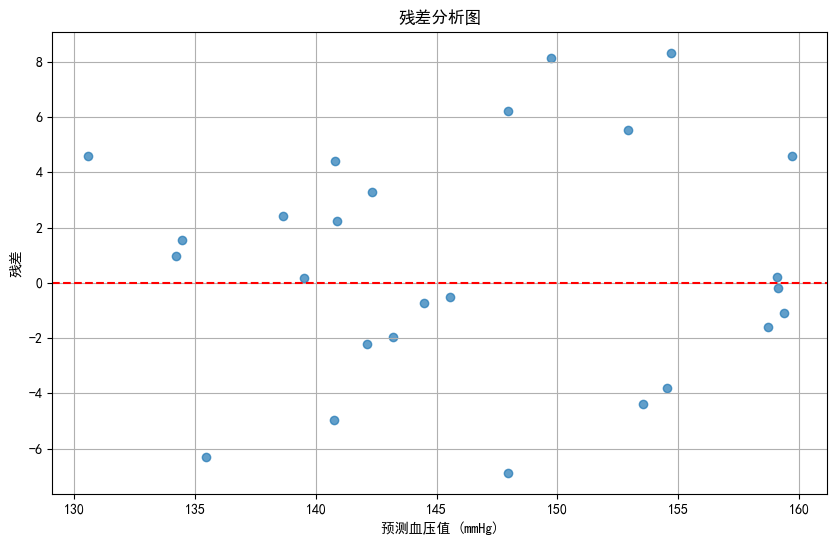

In [4]:
# 计算评估指标
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"模型评估:")
print(f"均方误差(MSE): {mse:.2f}")
print(f"R平方(R2): {r2:.2f}")

# 获取模型系数
coefficients = pd.DataFrame({
    '特征': X.columns,
    '系数': model.coef_
})

print("\n模型系数:")
print(coefficients)
print(f"截距: {model.intercept_:.2f}")

# 绘制实际值与预测值散点图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # 对角线
plt.xlabel('实际血压值 (mmHg)')
plt.ylabel('预测血压值 (mmHg)')
plt.title('血压实际值与预测值比较')
plt.grid(True)
plt.savefig('shijide.png')
plt.show()

# 绘制残差图
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('预测血压值 (mmHg)')
plt.ylabel('残差')
plt.title('残差分析图')
plt.grid(True)
plt.savefig('cancha.png')
plt.show()